In [14]:
import numpy as np
import pandas as pd 


In [15]:
pd.set_option('display.max_colwidth',200)

In [16]:
reviews =pd.read_csv("G:\\Jio\\Data\\googleplaystore_user_reviews.csv")
print(reviews .shape)
reviews .head(5)

(64295, 5)


App  \
0  10 Best Foods for You   
1  10 Best Foods for You   
2  10 Best Foods for You   
3  10 Best Foods for You   
4  10 Best Foods for You   

                                                                                                            Translated_Review  \
0  I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"   
1                                                                             This help eating healthy exercise regular basis   
2                                                                                                                         NaN   
3                                                                                  Works great especially going grocery store   
4                                                                                                                Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [17]:
len(reviews["App"].unique())

1074

In [18]:
# the dataframe has reviews for over a 1000 different apps

In [19]:
app_names = reviews["App"].unique()
print(type(app_names))
print(app_names)

<class 'numpy.ndarray'>
['10 Best Foods for You' '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st' ...
 'Hotwire Hotel & Car Rental App' 'Housing-Real Estate & Property'
 'Houzz Interior Design Ideas']


In [20]:
app_names_df = pd.DataFrame(app_names)
app_names_df.columns = ["App names"]
app_names_df.head(10) 

App names
0                             10 Best Foods for You
1                  104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室
2                                              11st
3                        1800 Contacts - Lens Store
4                   1LINE – One Line with One Touch
5  2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif
6                      21-Day Meditation Experience
7               2Date Dating App, Love and matching
8                       2GIS: directory & navigator
9                                         2RedBeans

In [21]:
selection = input("Enter the App on which you want the machine to perform sentiment analysis : ")

Enter the App on which you want the machine to perform sentiment analysis : 2RedBeans


In [22]:
filter = reviews['App']==selection
selected_reviews = pd.DataFrame(reviews[filter][['App','Translated_Review']],dtype='str')
selected_reviews.to_csv("Selected_app_demo.csv",sep = "\t")
selected_reviews.head(10)

App                                 Translated_Review
600  2RedBeans      What waiting for. Join platform thank later.
601  2RedBeans                                             Great
602  2RedBeans                                              nice
603  2RedBeans                   Kinda good know I find ms right
604  2RedBeans  exciting experience meet someone dont idea of...
605  2RedBeans                                  Best dating ever
606  2RedBeans                                         Very good
607  2RedBeans                                         Very nice
608  2RedBeans                                              Nice
609  2RedBeans                                              Good

In [23]:
polarity = 0
positive = 0
negative = 0
neutral  = 0

In [24]:
import matplotlib.pyplot as plt
from textblob import TextBlob

In [25]:
sentiment_measure = []
for review in selected_reviews['Translated_Review']:
    analyse = TextBlob(review)
    polarity = analyse.sentiment.polarity
    sentiment_measure.append(polarity)

In [26]:
sentiment_measure[0:5]

[0.0, 0.8, 0.6, 0.4928571428571428, 0.3]

In [27]:
sentiment_label = []
for score in sentiment_measure:
    if score == 0:
        neutral += 1
        sentiment_label.append("neutral")
    elif score > 0:
        positive += 1
        sentiment_label.append("positive")
    elif score < 0:
        negative += 1
        sentiment_label.append("negative")
    


In [28]:
total_reviews = len(sentiment_measure)
positive_percent = float((positive/total_reviews)*100)
negative_percent = float((negative/total_reviews)*100)
neutral_percent = float((neutral/total_reviews)*100)

In [29]:
print("For selected application : {}".format(selection))
print("positive : {} , neutral : {} , negative : {}".format(positive,neutral,negative))

For selected application : 2RedBeans
positive : 31 , neutral : 7 , negative : 2


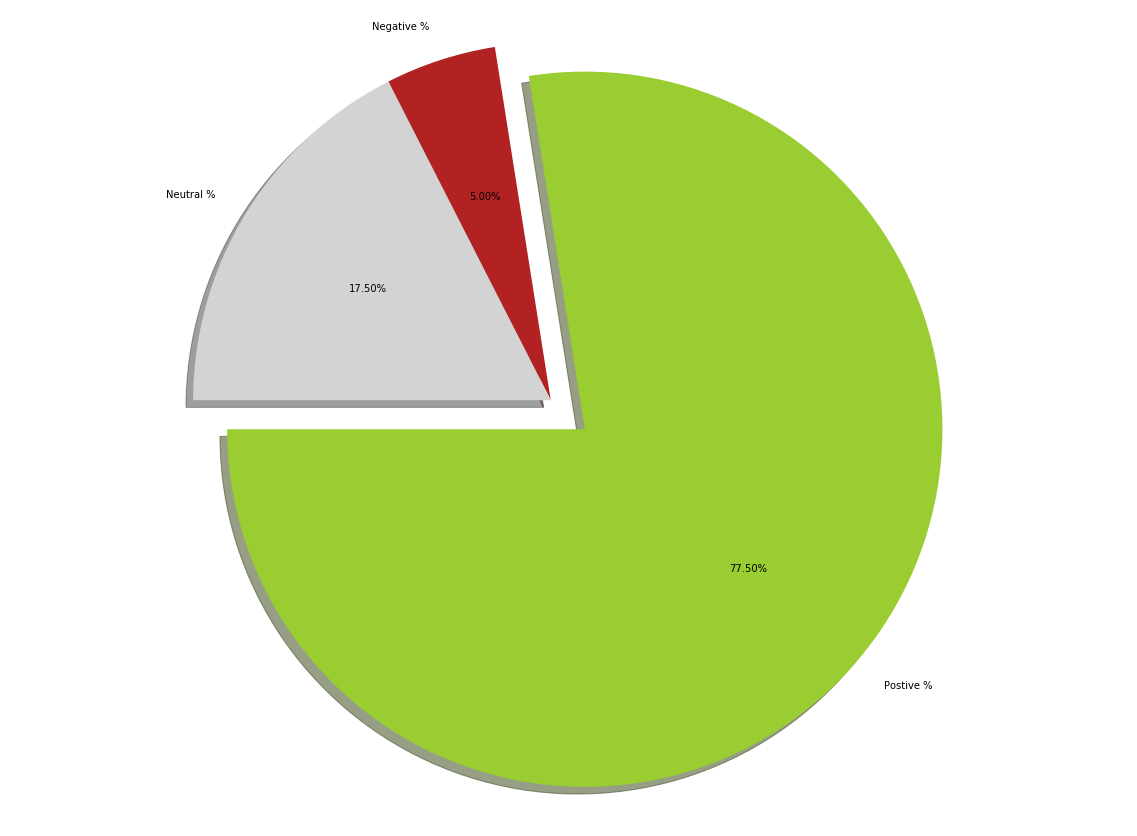

In [30]:
labels='Postive %','Negative %','Neutral %'
graph=[positive_percent,negative_percent,neutral_percent]
explode=(0.125,0,0)
colors = ["yellowgreen","firebrick","lightgray"]
fig1, ax1 = plt.subplots()
ax1.pie(graph, explode=explode, labels=labels,colors = colors ,autopct='%1.2f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
fig1.set_size_inches(20,15, forward=True)
plt.savefig("sentiment percentage.jpg")

In [21]:
selected_reviews["sentiment_label"] = sentiment_label
selected_reviews["sentiment_measure"] = sentiment_measure
result_data = selected_reviews
result_data.head(20)

App  \
440  21-Day Meditation Experience   
441  21-Day Meditation Experience   
442  21-Day Meditation Experience   
443  21-Day Meditation Experience   
444  21-Day Meditation Experience   
445  21-Day Meditation Experience   
446  21-Day Meditation Experience   
447  21-Day Meditation Experience   
448  21-Day Meditation Experience   
449  21-Day Meditation Experience   
450  21-Day Meditation Experience   
451  21-Day Meditation Experience   
452  21-Day Meditation Experience   
453  21-Day Meditation Experience   
454  21-Day Meditation Experience   
455  21-Day Meditation Experience   
456  21-Day Meditation Experience   
457  21-Day Meditation Experience   
458  21-Day Meditation Experience   
459  21-Day Meditation Experience   

                                                                                                                                                                                           Translated_Review  \
440                                                                     Terrible! Not user-friendly like original app. Please give customers option both. I look forward navigating cumbersome app. Namaste!   
441                                                                        Deeply disappointed. My free 21 days longer works. It asking high price meditations. I expect Oprah involved scam. I respect her.   
442                              Update 3.0 looks good. Would 5* without added pictures purchasing products taking space phone. All products already available making pictures redundant. Thanks experience.   
443  I guess can't please everyone... I loved update. I'm sure idea "streamlined" is, can't even read full title meditation trying use, theres problem. I love meditations themselves, comparing update u...   
444                                                                          This good ever I get notification phone stops meditation playing annoying I press play disturbs meditation. I prefer ed upgrade   
445                                                                                                                           I able listen 21 days past 2 frozen / crashed play. I liked upgrade point lot.   
446                                                                                     Love offers dislike intensely keeps playing episode episode hours end. Used stop selected finished, much better way.   
447                                                                                  Seems like update occurred, let access free meditation experience. Yesterday did, today matter try let me. Frustrating.   
448                                                                                I'm 21 days FREE meditation attraction. At first I could see program free. But update keeps showing order continue I pay.   
449                                                      I Started Manifesting I want From 2nd Day My Meditation. I Wholeheartedly Thank Deepak ji Oprah Bringing This Excellent App. Highly Recommend it!!!   
450                                                                                                                                                              Great experience. User friendly navigation.   
451                                                                                                                                                                                                     Cool   
452  It would best crashing time. The new version keeps crashing every time I open app. I'm missing 21 day experiences ones I purchased I cannot access now. It's getting frustrating. Plus new version a...   
453  The 21-Day Meditations excellent addition daily meditation practice. Truly enjoy listening Oprah & Deepak. Short enough anytime, AM PM. It would merit 5-star ongoing glitch. I've uninstalled reins...   
454                                                This glitchy phone. More often not, it'll say "mediation failed load" available. 